Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
file_path = 'Liver_disease_data.csv'
data = pd.read_csv(file_path)


Check for missing values

In [3]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


Handle categorical data (Gender) and normalize features

In [5]:
numeric_features = ['Age', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension']
categorical_features = ['Gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

Define the feature variables (X) and the target variable (y)

In [6]:
X = data.drop(columns='LiverFunctionTest')
y = data['LiverFunctionTest']

 Split the data into training (80%) and testing sets (20%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Create a pipeline with preprocessing and the model

In [8]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

Train the model


In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'Smoking', 'GeneticRisk',
                                                   'PhysicalActivity',
                                                   'Diabetes',
                                                   'Hypertension']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('model', LinearRegression())])

Make predictions on the test set

In [10]:
y_pred = pipeline.predict(X_test)

 Evaluate the model's performance

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 554.7284491085377
R-squared: -0.0018564309673392287
Mean Absolute Error: 20.635933876829842


Cross-validation for hyperparameter tuning

In [13]:
cv_results = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {cv_results}')
print(f'Mean cross-validated R-squared score: {cv_results.mean()}')

Cross-validated R-squared scores: [ 0.00190265 -0.01465156  0.00573726 -0.02611819 -0.02194053]
Mean cross-validated R-squared score: -0.011014073207834629


Residual plot

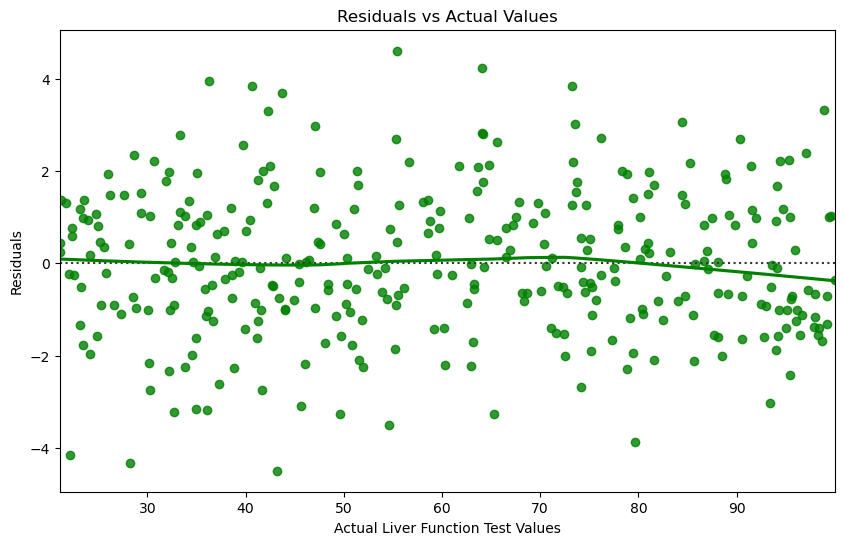

In [14]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
plt.xlabel('Actual Liver Function Test Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()

Distribution of errors

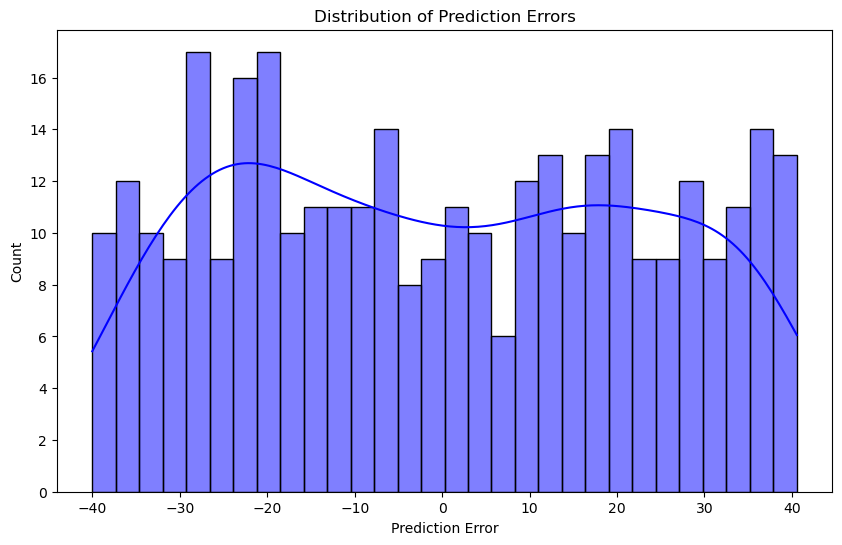

In [15]:
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue')
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

 Actual vs. Predicted values

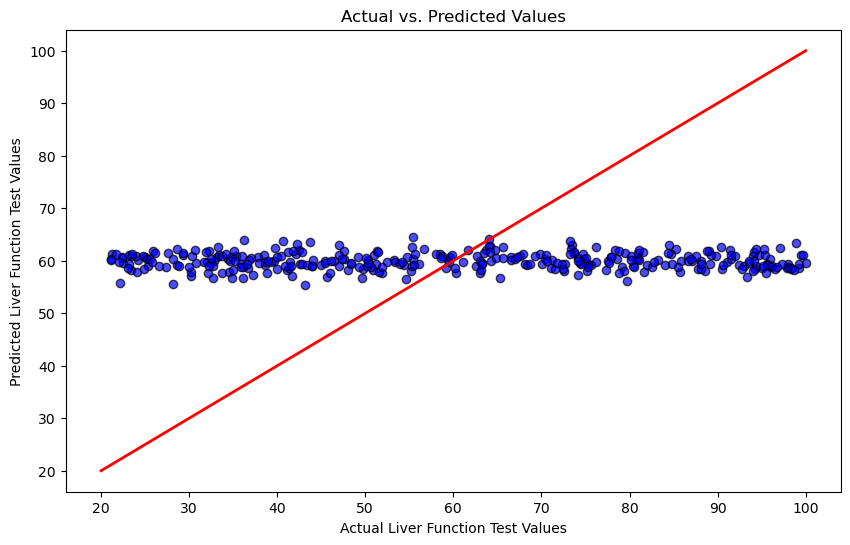

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual Liver Function Test Values')
plt.ylabel('Predicted Liver Function Test Values')
plt.title('Actual vs. Predicted Values')
plt.show()